# Assignment 1: Dimensionality Reduction using PCA

## Question 1

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# 1. Retrieve and load the mnist_784 dataset of 70,000 instances.
mnist = datasets.fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
print("Shape of MNIST dataset: ", mnist[0].shape)

Shape of MNIST dataset:  (70000, 784)


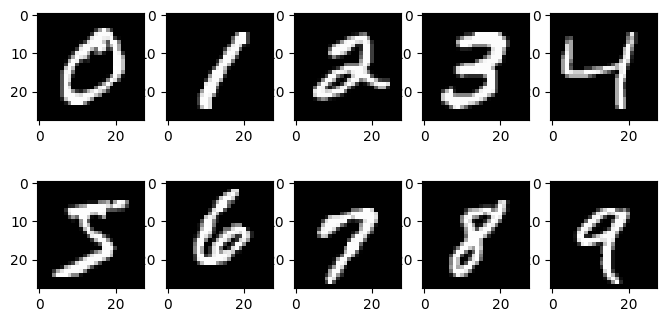

In [63]:
df = pd.DataFrame(mnist[0])

plt.figure(figsize=(8, 4))
# 2. Display each digit
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    # First image representing digit i
    digit = df.loc[mnist[1] == str(i)].iloc[0]
    # Display image
    plt.imshow(digit.values.reshape(28, 28), cmap='gray')

In [12]:
# 3. Use PCA to retrieve the 1st and 2nd principal components and output their explained variance ratio
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(mnist[0])

PCA(n_components=2)

In [13]:
print("Explained variance ratio of the 1st and 2nd principal components: ", pca.explained_variance_ratio_)

Explained variance ratio of the 1st and 2nd principal components:  [0.09746116 0.07155444]


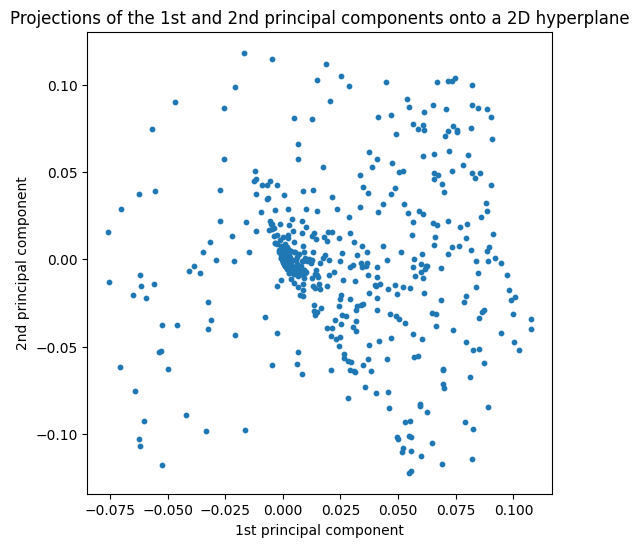

In [33]:
# 4. Plot the projections of the 1st and 2nd principal components onto a 2D hyperplane.
plt.figure(figsize=(6, 6))
plt.scatter(pca.components_[0], pca.components_[1], s=10)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Projections of the 1st and 2nd principal components onto a 2D hyperplane')
plt.show()

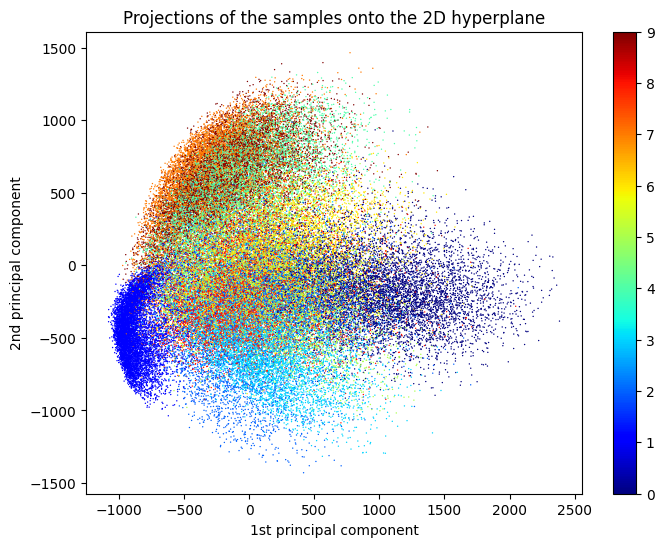

In [50]:
# Plot each sample in the dataset onto the 2D hyperplane
plt.figure(figsize=(8, 6))
plt.scatter(pca.transform(mnist[0])[:, 0], pca.transform(mnist[0])[:, 1],
            c=mnist[1].astype(int), edgecolor='none', s=1, cmap='jet')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Projections of the samples onto the 2D hyperplane')
plt.colorbar()
plt.show()

In [56]:
# 5. Use Incremental PCA to reduce the dimensionality of the MNIST dataset down to 154 dimensions.
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=154)
ipca.fit(mnist[0].values)

IncrementalPCA(n_components=154)

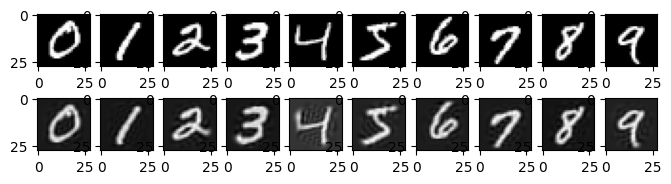

In [60]:
# 6. Display the original and compressed digits

plt.figure(figsize=(8, 2))
for i in range(0, 10):
    plt.subplot(2, 10, i+1)
    # First image representing digit i
    digit = df.loc[mnist[1] == str(i)].iloc[0]
    # Display image
    plt.imshow(digit.values.reshape(28, 28), cmap='gray')
    plt.subplot(2, 10, i+11)
    # First image representing digit i
    digit = ipca.inverse_transform(ipca.transform(digit.values.reshape(1, -1)))
    # Display image
    plt.imshow(digit.reshape(28, 28), cmap='gray')

In [ ]:
# 7. TODO: Create a video discussing the code and result for each question.
# Discuss challenges you confronted and solutions to overcoming them, if applicable.

## Question 2